<a href="https://colab.research.google.com/github/hstorm/ML_course_Calabria2020/blob/master/lab/Calabria_Day2_HS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook for Day 2

# during lecture



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import tree



In [2]:

# Download data
!wget http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv

--2020-07-05 08:23:27--  http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv
Resolving www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)... 131.220.69.2
Connecting to www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)|131.220.69.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789226067 (753M) [application/octet-stream]
Saving to: ‘brazil_all_data_v2.csv’

brazil_all_data_v2. 100%[===================>] 752.66M  6.21MB/s    in 2m 20s  

2020-07-05 08:25:48 (5.37 MB/s) - ‘brazil_all_data_v2.csv’ saved [789226067/789226067]



In [3]:
# Load data with pandas into a dataframe 
df = pd.read_csv('brazil_all_data_v2.csv')

In [4]:
# Define binary variable for deforestration in 2018
df['D_defor_2018'] = df['defor_2018']>0
Y_all = df['D_defor_2018']

In [5]:
# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  # 'pasture',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  # 'pasture_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
 ]

# Get the explanatory Variables
X_all =  df.loc[:,lstX]

In [6]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [7]:
# Scale data to 0-1 range using sklearn MinMaxScalar object 
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar 
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data 
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

Run logit on deforestation dummy variable

In [8]:
# Fit a logistic regression model using sklearn (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# Create the model object
modelLg = LogisticRegression(random_state=0,penalty='none',fit_intercept=True,max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Function to print model stats
def printOutput(mod,X_train,Y_train,X_test,Y_test):
  # view results
  print('Score in train', mod.score(X_train, Y_train))
  print('Score in test', mod.score(X_test, Y_test))

  Y_test_had_Tree = mod.predict(X_test)

  print('\nConfusion Matrix')
  print(pd.DataFrame(confusion_matrix(Y_test, Y_test_had_Tree),
            index=pd.MultiIndex.from_arrays([['actual','actual'], ['False','True']]),
            columns=pd.MultiIndex.from_arrays([['predicted','predicted'], ['False','True']])))

In [10]:
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

# Compute ROC curve and ROC area for each class
Y_score = modelLg.decision_function(X_test)
fpr_Lg, tpr_Lg, _ = roc_curve(Y_test, Y_score)
roc_auc_Lg = auc(fpr_Lg, tpr_Lg)
print('ROC AUC', roc_auc_Lg)

Score in train 0.7851984476274306
Score in test 0.7877290549731936

Confusion Matrix
             predicted      
                 False  True
actual False     36758  1339
       True       9272  2619
ROC AUC 0.7615194572122792


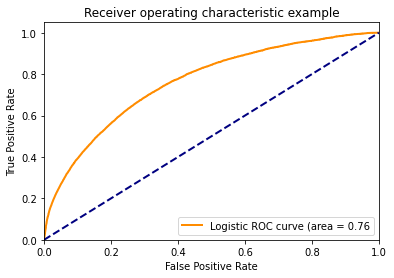

In [12]:

plt.figure()
lw = 2
plt.plot(fpr_Lg, tpr_Lg, color='darkorange',
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc_Lg)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Now run a decision tree using the same specification

In [17]:
# run a decision tree using sklearn
modelTree = tree.DecisionTreeClassifier()
modelTree = modelTree.fit(X_train, Y_train)

In [18]:
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

Score in train 1.0
Score in test 0.7610026406337521

Confusion Matrix
             predicted      
                 False  True
actual False     31966  6131
       True       5816  6075


Run the same model using  a random forest

In [19]:
# run a random forest using sklearn and default hyperparameters
from sklearn.ensemble import RandomForestClassifier

modelForest = RandomForestClassifier()
modelForest = modelForest.fit(X_train, Y_train)

In [20]:
printOutput(modelForest,X_train,Y_train,X_test,Y_test)


Score in train 1.0
Score in test 0.8358406017444187

Confusion Matrix
             predicted      
                 False  True
actual False     35726  2371
       True       5835  6056


Visualizing the results

In [21]:
# Produce a ROC-AOC curve
# See here https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

# ==> For trees ROC are not directly avalaible and do not really make sense
# Lets discuss this again

Feature ranking:
1. wdpa_2017 (0.165581)
2. population_2015 (0.068099)
3. chirps_2017 (0.049176)
4. defor_2017 (0.042078)
5. maize (0.037511)
6. soy (0.037417)
7. sugarcane (0.036276)
8. perc_treecover (0.036133)
9. perm_water (0.035561)
10. travel_min (0.034208)
11. cropland (0.033949)
12. mean_elev (0.033323)
13. sd_elev (0.032866)
14. near_road (0.032040)
15. defor_2017_lag_1st_order (0.031577)
16. wdpa_2017_lag_1st_order (0.029871)
17. chirps_2017_lag_1st_order (0.029416)
18. population_2015_lag_1st_order (0.029409)
19. maize_lag_1st_order (0.029274)
20. soy_lag_1st_order (0.028338)
21. sugarcane_lag_1st_order (0.025051)
22. perc_treecover_lag_1st_order (0.024483)
23. perm_water_lag_1st_order (0.024384)
24. travel_min_lag_1st_order (0.023203)
25. cropland_lag_1st_order (0.021377)
26. mean_elev_lag_1st_order (0.013816)
27. sd_elev_lag_1st_order (0.008860)
28. near_road_lag_1st_order (0.006723)


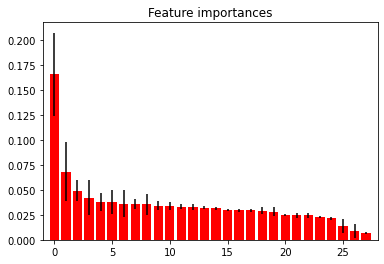

In [22]:
# generate a feature importance graph
# Adjusted based on  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = modelForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, lstX[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Lab 2a 

The first part of today's lab will have you predict deforestation using both a random forest and XGboost models

In [ ]:
# Run RF on deforestation


In [23]:
# Run XGBoost on deforestation
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
printOutput(model_xgb,X_train,Y_train,X_test,Y_test)


Score in train 0.820386892854285
Score in test 0.8194166599983996

Confusion Matrix
             predicted      
                 False  True
actual False     35506  2591
       True       6436  5455


In [25]:
# Comprae outcome from all models
print('\n--- Logistic')
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

print('\n--- Tree')
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

print('\n--- Forest')
printOutput(modelForest,X_train,Y_train,X_test,Y_test)

print('\n--- XG Boost')
printOutput(model_xgb,X_train,Y_train,X_test,Y_test)



--- Logistic
Score in train 0.7851984476274306
Score in test 0.7877290549731936

Confusion Matrix
             predicted      
                 False  True
actual False     36758  1339
       True       9272  2619

--- Tree
Score in train 1.0
Score in test 0.7610026406337521

Confusion Matrix
             predicted      
                 False  True
actual False     31966  6131
       True       5816  6075

--- Forest
Score in train 1.0
Score in test 0.8358406017444187

Confusion Matrix
             predicted      
                 False  True
actual False     35726  2371
       True       5835  6056

--- XG Boost
Score in train 0.820386892854285
Score in test 0.8194166599983996

Confusion Matrix
             predicted      
                 False  True
actual False     35506  2591
       True       6436  5455


# Lab 2b

The second part of today's lab will estimate Shapley Values for your random forest model of deforestation

Specifically, deterimine how much protected areas seems to explain the prediction of deforestation (and discuss one or two other features that determine deforestation)


In [26]:
!pip install shap

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394112 sha256=0a6f5ebad132dbcf71a9f49859fd2e4d90e08d4fd17b2291dff8129dc31b2ca4
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [28]:
import shap
# load JS visualization code to notebook
shap.initjs()


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model_xgb)
df_X_train = pd.DataFrame(X_train,columns=lstX)
shap_values = explainer.shap_values(df_X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], df_X_train.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


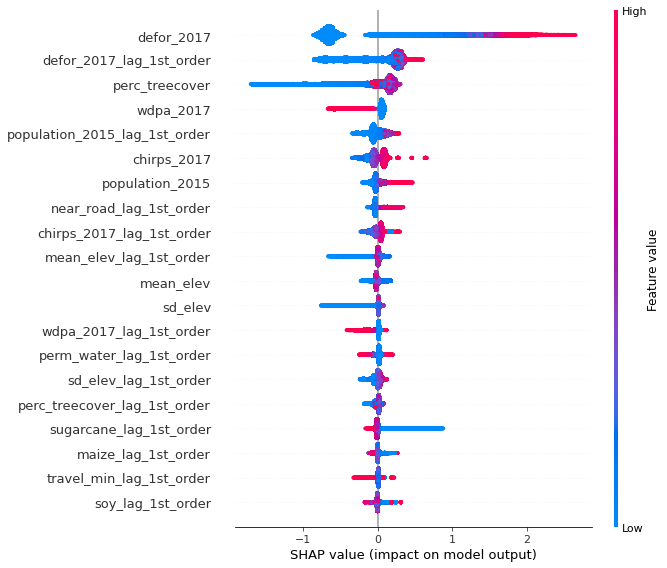

In [29]:
# summarize the effects of all the features
shap.summary_plot(shap_values, df_X_train)

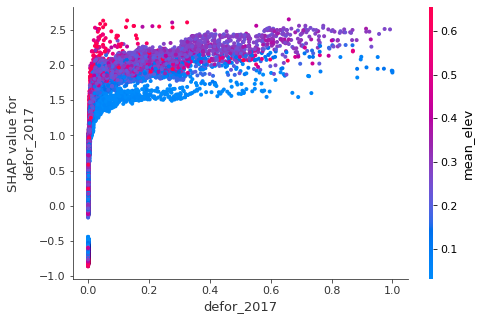

In [30]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("defor_2017", shap_values, df_X_train)